In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

In [2]:
def add_noice(img, type, frq):
    assert type == 'sp' or type == 'crc'
    assert frq <= 1 and frq >= 0
    map = np.zeros(img.shape)
    for i in range(1, img.shape[0]):
        for j in range(1, img.shape[1]):
            if random.random() < frq:
                if type == 'crc':
                    img[i-1:i+2, j-1:j+2] = 1
                elif type == 'sp':
                    img[i, j] = 1
                map[i, j] = 1
    img[img>1] = 1
    return img, map

In [3]:
true = plt.imread('images/text-c-true.png')
true[true <= 0.5] = 0
true[true > 0.5] = 1
true = (~true.astype(bool)).astype(float)

In [4]:
crc, map_crc = add_noice(true.copy(), 'crc', 0.02)
sp, map_sp = add_noice(true.copy(), 'sp', 0.02)

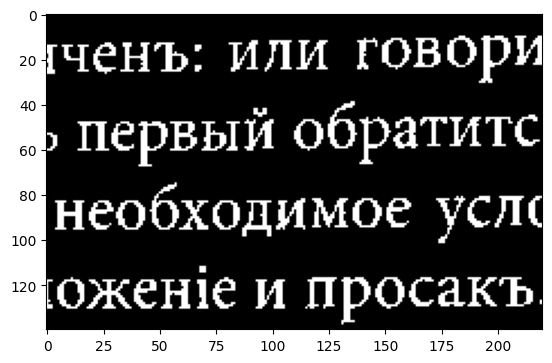

In [5]:
plt.imshow(true, cmap='gray')
plt.show()

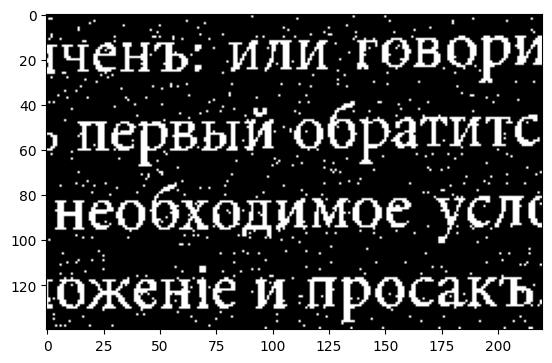

In [6]:
plt.imshow(sp, cmap='gray')
plt.show()
plt.show()

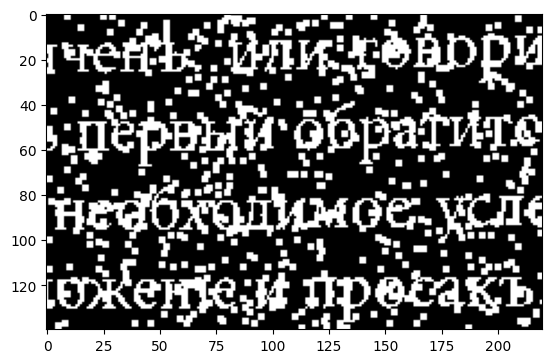

In [7]:
plt.imshow(crc, cmap='gray')
plt.show()

In [8]:
def get_horizontal_filtred_image(img, f_size, direction):
  assert len(img.shape) == 2
  assert direction in ('h', 'v')
  if direction == 'v':
    return np.rot90(get_horizontal_filtred_image(np.rot90(img), f_size, direction='h'), k=3)
  H, W = img.shape
  img = np.pad(img, ((0,0), (f_size-1, f_size-1)))
  result = np.zeros((H, W))
  for y in range(0, H):
    for x in range(f_size-1, W+f_size-1):
      c_s = []
      delta_s = []
      for i in range(f_size):
        area = img[y, x-(f_size-1)+i:x+1+i]
        c = np.mean(area)
        c_s.append(c)
        temp = np.ones((1, f_size))*c
        delta  = np.mean(np.square(temp - area))
        delta_s.append(delta)
      result[y, x - (f_size-1)] = c_s[np.argmin(delta_s)]
  return result

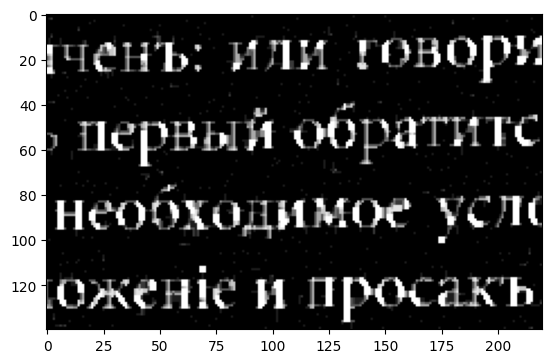

In [9]:
plt.imshow(get_horizontal_filtred_image(get_horizontal_filtred_image(sp.copy(), 3, direction='h'), 3, direction='v'), cmap='gray')

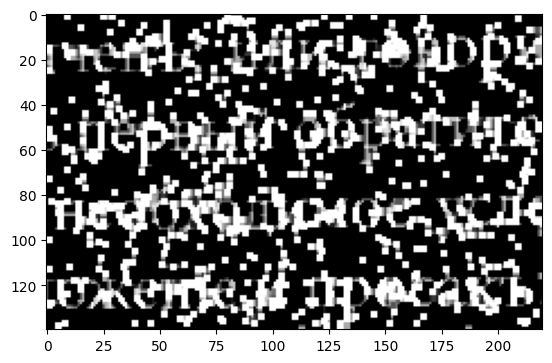

In [10]:
plt.imshow(get_horizontal_filtred_image(get_horizontal_filtred_image(crc.copy(), 3, direction='h'), 3, direction='v'), cmap='gray')

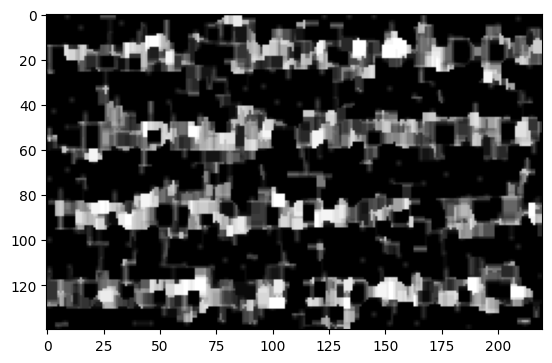

In [11]:
plt.imshow(get_horizontal_filtred_image(get_horizontal_filtred_image(crc.copy(), 5, direction='h'), 5, direction='v'), cmap='gray')